FRP

- mean, median, std, min, max for frp values for year and month

- total observations for year, month and day

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv(r"E:\IPMA\FRP\FRP_2000_2024.csv")

# Display the first few rows of the dataset to check the structure
df.head()

# Convert the 'acq_date' column to datetime format
df['acq_date'] = pd.to_datetime(df['acq_date'])

# Extract the year, month, and day from the 'acq_date' column
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day'] = df['acq_date'].dt.day

# Display the dataset to ensure the new columns were added correctly
print(df.head())


   latitude  longitude  brightness  scan  track   acq_date  acq_time  \
0   36.8527    35.3594       306.0   2.1    1.4 2000-11-01       815   
1   49.5459    23.5306       326.6   1.0    1.0 2000-11-01       950   
2   49.5480    23.5170       347.1   1.0    1.0 2000-11-01       950   
3   48.7390    29.1738       306.8   1.5    1.2 2000-11-01       950   
4   49.5695    23.4383       303.8   1.0    1.0 2000-11-01       950   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  \
0     Terra      MODIS          60     6.03       294.4  13.2        D     0   
1     Terra      MODIS          84     6.03       286.4  21.9        D     0   
2     Terra      MODIS          95     6.03       291.3  53.6        D     0   
3     Terra      MODIS          33     6.03       287.7  13.7        D     0   
4     Terra      MODIS          57     6.03       286.8   5.6        D     0   

   year  month  day  
0  2000     11    1  
1  2000     11    1  
2  2000     11    1 

In [3]:
# Calculate the summary statistics (mean, median, std, min, max) for FRP by year
yearly_stats = df.groupby('year')['frp'].agg([
    ('mean', np.nanmean),
    ('median', np.nanmedian),
    ('std', np.nanstd),
    ('min', np.nanmin),
    ('max', np.nanmax)
]).reset_index()

# Display the yearly statistics table
print(yearly_stats.head())

yearly_stats

   year       mean  median         std  min     max
0  2000  16.827405    10.6   26.395339  0.0   704.0
1  2001  28.658656    15.4   50.452488  0.0  3125.0
2  2002  24.839850    13.7   49.208924  0.0  2863.6
3  2003  33.509330    13.4  106.276014  0.0  4694.2
4  2004  25.647322    13.1   69.824690  0.0  4692.7


C:\Users\sofia\AppData\Local\Temp\ipykernel_12572\3100510158.py:2: FutureWarning: The provided callable <function nanmean at 0x0000022493F254E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  yearly_stats = df.groupby('year')['frp'].agg([
C:\Users\sofia\AppData\Local\Temp\ipykernel_12572\3100510158.py:2: FutureWarning: The provided callable <function nanmedian at 0x0000022493F25800> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  yearly_stats = df.groupby('year')['frp'].agg([
C:\Users\sofia\AppData\Local\Temp\ipykernel_12572\3100510158.py:2: FutureWarning: The provided callable <function nanstd at 0x0000022493F25EE0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To k

,year,mean,median,std,min,max
0,2000,16.827405,10.6,26.395339,0.0,704.0
1,2001,28.658656,15.4,50.452488,0.0,3125.0
2,2002,24.839850,13.7,49.208924,0.0,2863.6
3,2003,33.509330,13.4,106.276014,0.0,4694.2
4,2004,25.647322,13.1,69.824690,0.0,4692.7
5,2005,30.210825,13.7,80.963621,0.0,5873.1
6,2006,27.161530,13.9,60.083148,0.0,4188.6
7,2007,35.446544,14.8,102.406760,0.0,5148.6
8,2008,28.227382,15.0,55.395916,0.0,3382.4
9,2009,27.371534,13.7,67.310215,0.0,6091.7


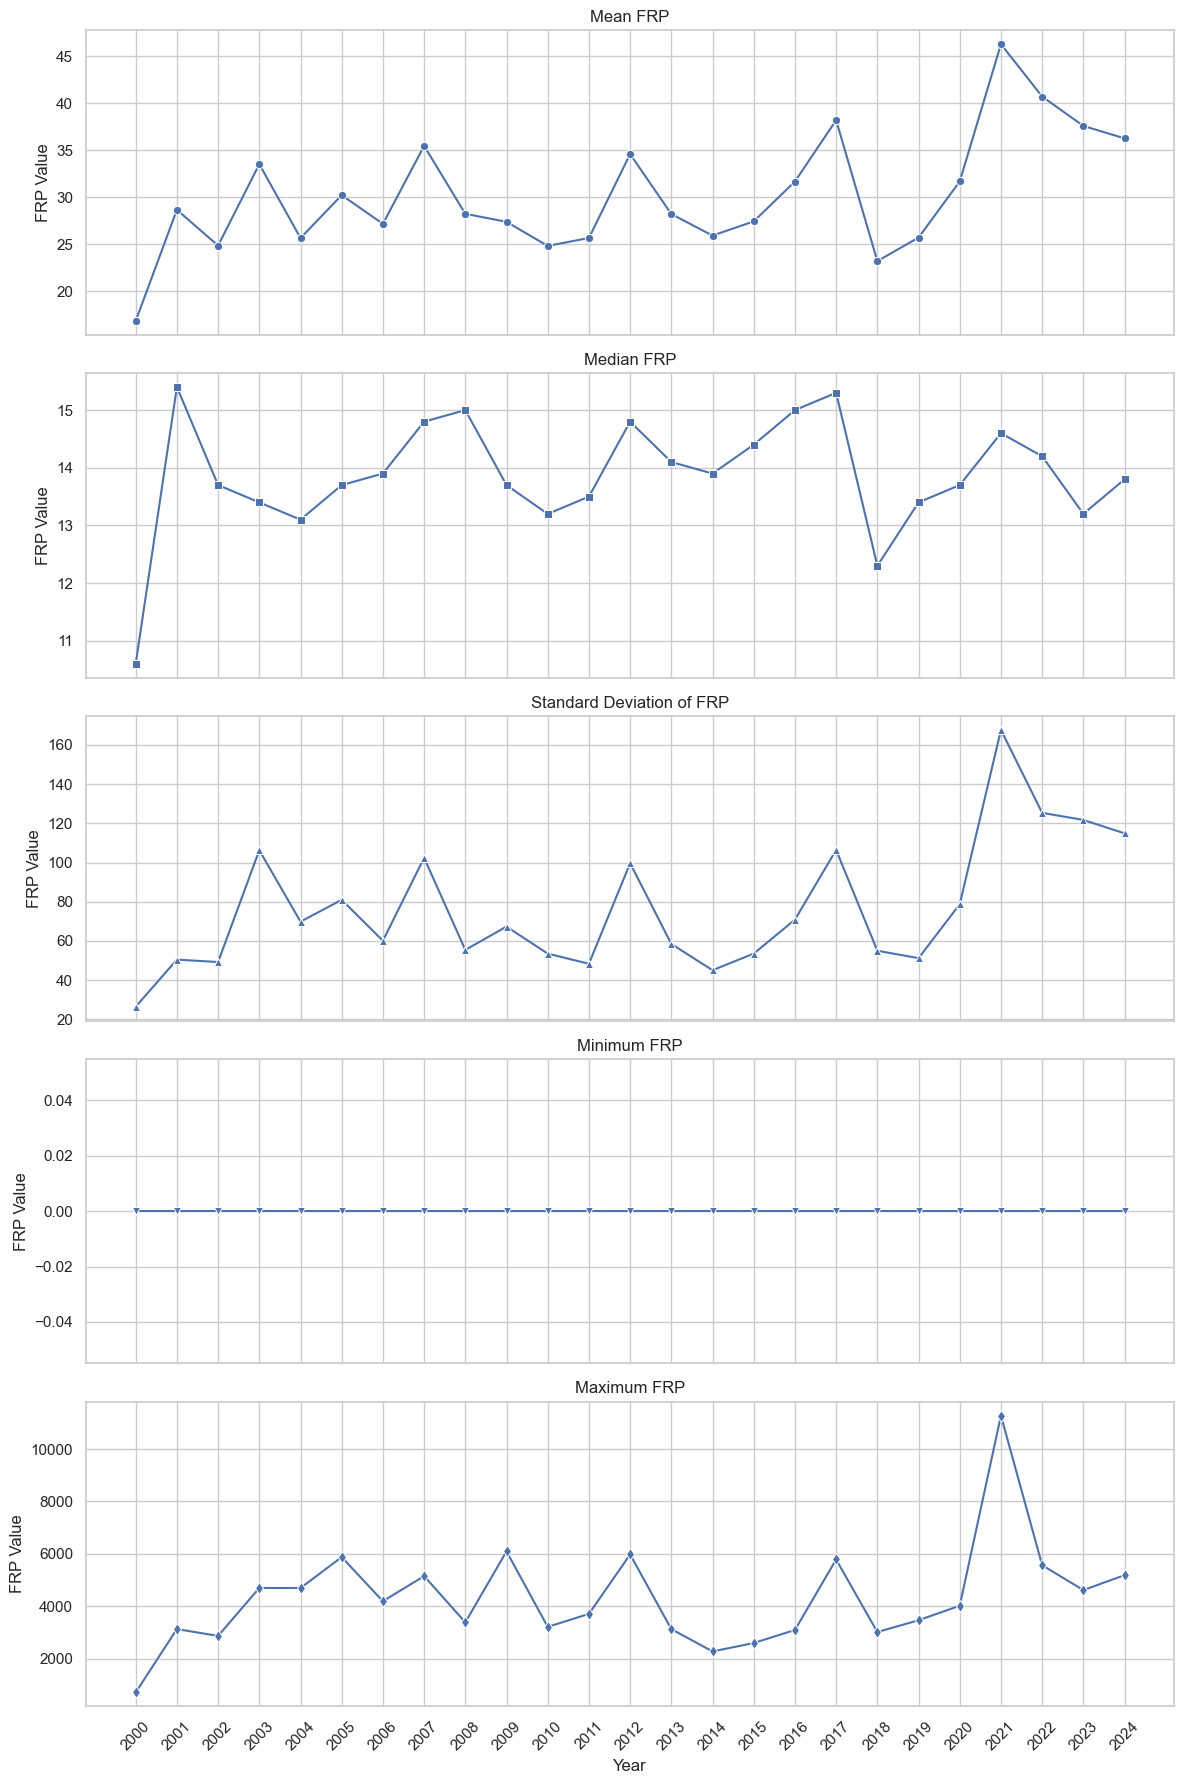

In [4]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Create a figure with 5 subplots (stacked vertically)
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

# Define statistics and labels
stats = ['mean', 'median', 'std', 'min', 'max']
titles = ['Mean FRP', 'Median FRP', 'Standard Deviation of FRP', 'Minimum FRP', 'Maximum FRP']
markers = ['o', 's', '^', 'v', 'd']  # Different markers for distinction

# Loop through each statistic and create a separate plot
for i, stat in enumerate(stats):
    sns.lineplot(data=yearly_stats, x='year', y=stat, marker=markers[i], linestyle='-', ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('FRP Value')
    axes[i].grid(True)

# Ensure all years are displayed on the x-axis
years = yearly_stats['year'].unique()
axes[-1].set_xticks(years)
axes[-1].set_xticklabels(years, rotation=45)  # Rotate labels for better visibility

# Set common X-axis label
axes[-1].set_xlabel('Year')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [5]:
# Calculate the summary statistics (mean, median, std, min, max) for FRP by month
monthly_stats = df.groupby(['year', 'month'])['frp'].agg([
    ('mean', np.nanmean),
    ('median', np.nanmedian),
    ('std', np.nanstd),
    ('min', np.nanmin),
    ('max', np.nanmax)
]).reset_index()

# Display the yearly statistics table
print(monthly_stats.head())

monthly_stats

   year  month       mean  median        std  min    max
0  2000     11  15.605458     9.8  27.002846  2.6  704.0
1  2000     12  22.557087    15.3  22.514382  0.0  174.6
2  2001      1  21.052553    15.2  19.005728  0.0  178.7
3  2001      2  20.361068    11.9  33.976331  3.1  585.5
4  2001      3  18.645463    12.1  20.994088  2.6  275.6


C:\Users\sofia\AppData\Local\Temp\ipykernel_12572\3268509450.py:2: FutureWarning: The provided callable <function nanmean at 0x0000022493F254E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  monthly_stats = df.groupby(['year', 'month'])['frp'].agg([
C:\Users\sofia\AppData\Local\Temp\ipykernel_12572\3268509450.py:2: FutureWarning: The provided callable <function nanmedian at 0x0000022493F25800> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  monthly_stats = df.groupby(['year', 'month'])['frp'].agg([
C:\Users\sofia\AppData\Local\Temp\ipykernel_12572\3268509450.py:2: FutureWarning: The provided callable <function nanstd at 0x0000022493F25EE0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable wil

,year,month,mean,median,std,min,max
0,2000,11,15.605458,9.8,27.002846,2.6,704.0
1,2000,12,22.557087,15.3,22.514382,0.0,174.6
2,2001,1,21.052553,15.2,19.005728,0.0,178.7
3,2001,2,20.361068,11.9,33.976331,3.1,585.5
4,2001,3,18.645463,12.1,20.994088,2.6,275.6
...,...,...,...,...,...,...,...
285,2024,8,41.145469,16.8,131.675091,0.0,5155.1
286,2024,9,57.779774,18.6,172.568397,2.1,5184.5
287,2024,10,17.597462,9.6,36.958977,0.0,963.1
288,2024,11,14.700000,9.1,27.481217,2.9,672.6


C:\Users\sofia\AppData\Local\Temp\ipykernel_12572\3902426683.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_stats['date'] = pd.to_datetime(filtered_stats[['year', 'month']].assign(day=1))


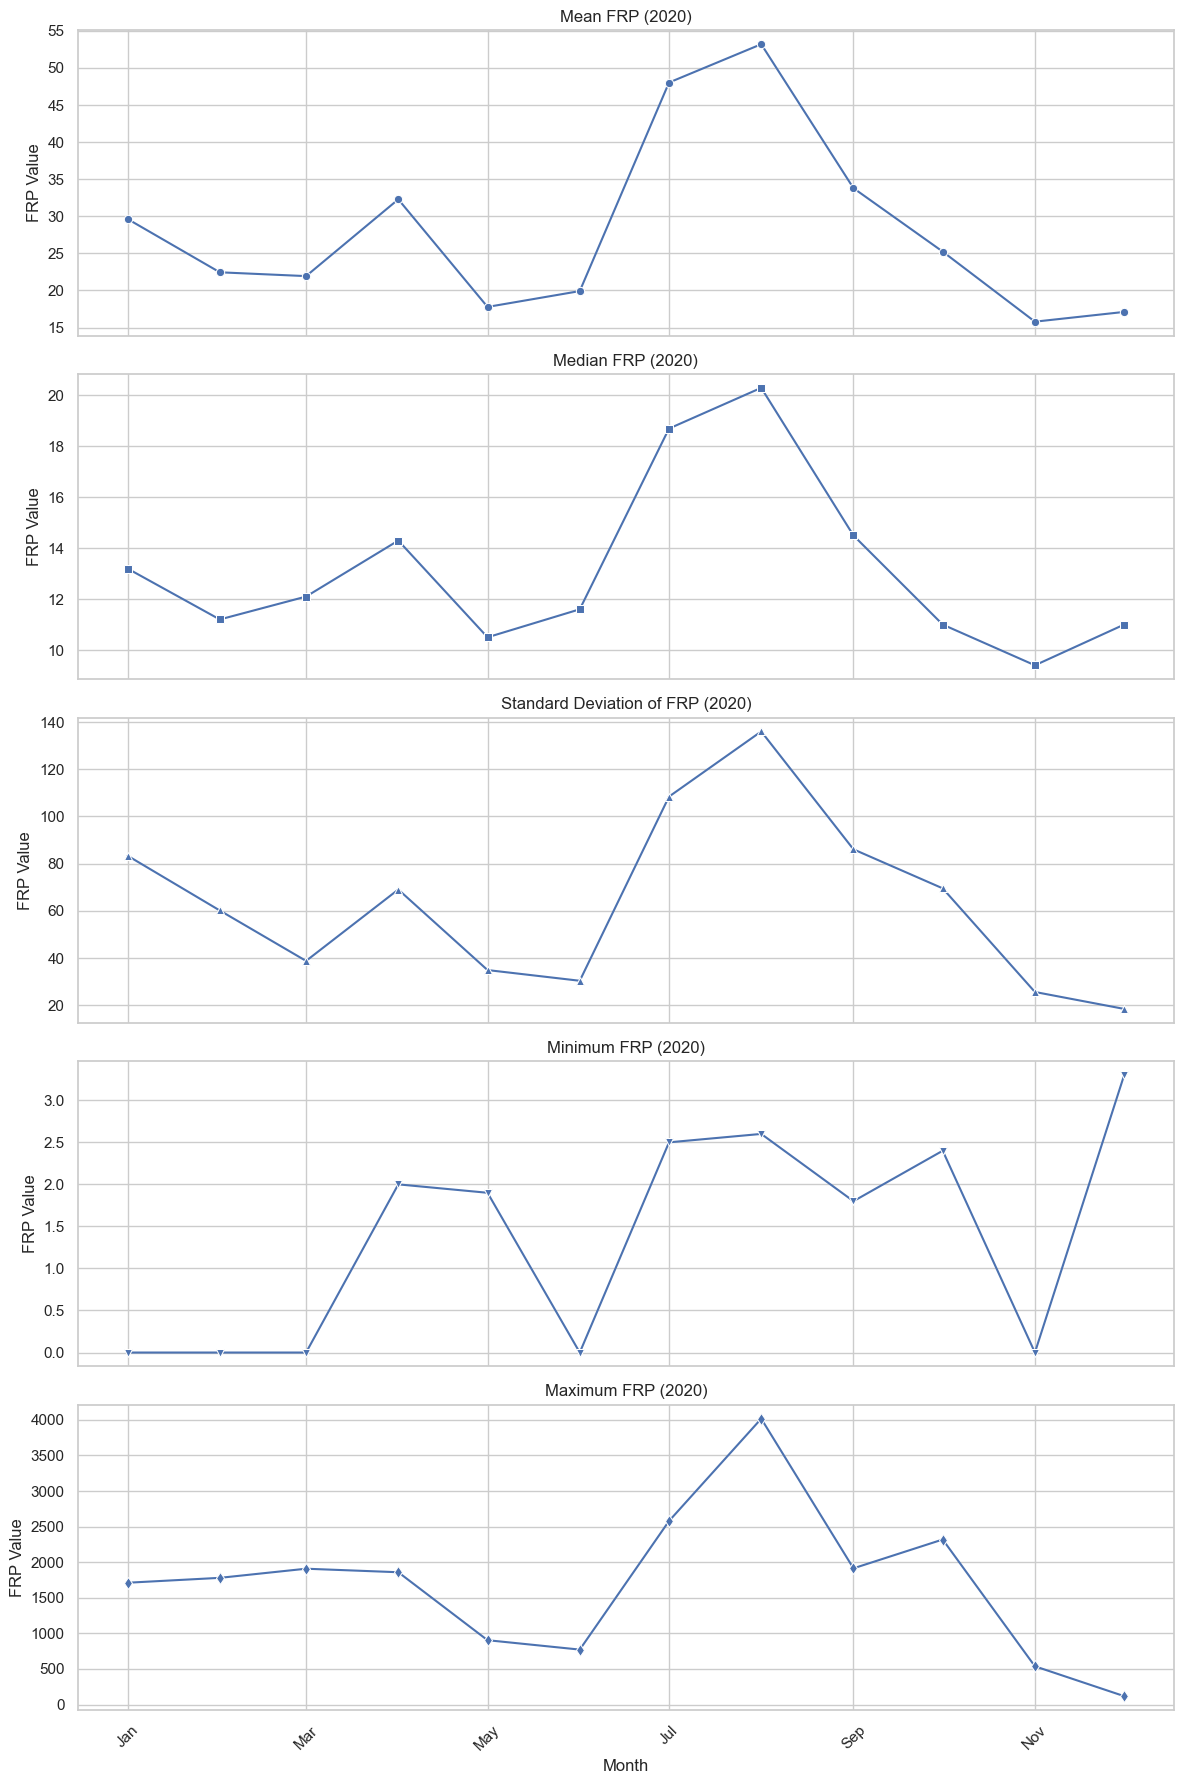

In [6]:
# Set seaborn style
sns.set_theme(style="whitegrid")

# Choose the year you want to visualize
selected_year = 2020  # Change this value to see different years

# Filter the data for the selected year
filtered_stats = monthly_stats[monthly_stats['year'] == selected_year]

# Create a new datetime column for proper plotting (Year-Month format)
filtered_stats['date'] = pd.to_datetime(filtered_stats[['year', 'month']].assign(day=1))

# Create figure with 5 subplots (stacked vertically)
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

# Define statistics and labels
stats = ['mean', 'median', 'std', 'min', 'max']
titles = [f'Mean FRP ({selected_year})', f'Median FRP ({selected_year})', 
          f'Standard Deviation of FRP ({selected_year})', 
          f'Minimum FRP ({selected_year})', f'Maximum FRP ({selected_year})']
markers = ['o', 's', '^', 'v', 'd']  # Different markers for distinction

# Loop through each statistic and create a separate plot
for i, stat in enumerate(stats):
    sns.lineplot(data=filtered_stats, x='date', y=stat, marker=markers[i], linestyle='-', ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('FRP Value')
    axes[i].grid(True)

# Format x-axis to display months properly
axes[-1].set_xlabel('Month')
axes[-1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Format as month name (Jan, Feb, etc.)
plt.xticks(rotation=45)  # Rotate labels for better visibility

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [7]:
# Calculate the summary statistics (mean, median, std, min, max) for FRP by day
daily_stats = df.groupby(['year', 'month', 'day'])['frp'].agg([
    ('mean', np.nanmean),
    ('median', np.nanmedian),
    ('std', np.nanstd),
    ('min', np.nanmin),
    ('max', np.nanmax)
]).reset_index()

# Display the yearly statistics table
print(daily_stats.head())

daily_stats

   year  month  day       mean  median        std  min    max
0  2000     11    1  12.396923    8.20  11.666940  3.8   76.4
1  2000     11    2  11.795918    8.30   9.917198  3.0   57.0
2  2000     11    3  19.469444   10.45  24.419814  3.6  123.8
3  2000     11    4   9.371795    7.20   5.637139  3.3   28.3
4  2000     11    5  14.054545   11.60  11.457969  3.2   60.3


C:\Users\sofia\AppData\Local\Temp\ipykernel_12572\520782593.py:2: FutureWarning: The provided callable <function nanmean at 0x0000022493F254E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  daily_stats = df.groupby(['year', 'month', 'day'])['frp'].agg([
C:\Users\sofia\AppData\Local\Temp\ipykernel_12572\520782593.py:2: FutureWarning: The provided callable <function nanmedian at 0x0000022493F25800> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  daily_stats = df.groupby(['year', 'month', 'day'])['frp'].agg([
C:\Users\sofia\AppData\Local\Temp\ipykernel_12572\520782593.py:2: FutureWarning: The provided callable <function nanstd at 0x0000022493F25EE0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided calla

,year,month,day,mean,median,std,min,max
0,2000,11,1,12.396923,8.20,11.666940,3.8,76.4
1,2000,11,2,11.795918,8.30,9.917198,3.0,57.0
2,2000,11,3,19.469444,10.45,24.419814,3.6,123.8
3,2000,11,4,9.371795,7.20,5.637139,3.3,28.3
4,2000,11,5,14.054545,11.60,11.457969,3.2,60.3
...,...,...,...,...,...,...,...,...
8790,2024,12,27,12.061538,12.80,5.739561,5.8,26.3
8791,2024,12,28,16.966667,15.05,9.281164,5.0,37.5
8792,2024,12,29,24.430000,23.90,10.770747,5.5,43.2
8793,2024,12,30,12.041176,11.20,4.369934,6.8,19.8


In [8]:
# Count the number of observations per year
yearly_counts = df.groupby('year').size().reset_index(name='count')

# Display the table of observations per year
print(yearly_counts.head())


   year   count
0  2000    1445
1  2001   61896
2  2002  101725
3  2003   88717
4  2004   89341


In [9]:
# Count the number of observations per month (group by year and month)
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

# Display the table of observations per month
print(monthly_counts.head())


   year  month  count
0  2000     11   1191
1  2000     12    254
2  2001      1    333
3  2001      2    637
4  2001      3   2215


In [10]:
# Count the number of observations per day (group by year, month, and day)
daily_counts = df.groupby(['year', 'month', 'day']).size().reset_index(name='count')

# Display the table of observations per day
print(daily_counts.head())


   year  month  day  count
0  2000     11    1     65
1  2000     11    2     49
2  2000     11    3     36
3  2000     11    4     39
4  2000     11    5     33
